# M2: Project 2

In this notebook we will be do multivariable analysis to develop a regression model that can predict the sale price of a property.

We will be using pandas for our data frame manipulation, seaborn and matplotlib for our plotting, collections for dictionaries, and scipy for our statistical analysis.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from collections import defaultdict
import scipy

Configure the default axis label size to 18.  Ensure the plots generated have a high resolution (150dpi).

In [2]:
plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150)

## Data Set

Load the cleaned output from the first project.

In [3]:
df = pd.read_feather("../m1p1b/csc5610-m2-Sacramento-real-estate-transactions-cleaned.feather")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      794 non-null    int64         
 1   address    794 non-null    object        
 2   city       794 non-null    category      
 3   zip        794 non-null    category      
 4   state      794 non-null    category      
 5   beds       794 non-null    int64         
 6   baths      794 non-null    int64         
 7   sq__ft     794 non-null    int64         
 8   type       794 non-null    category      
 9   sale_date  794 non-null    datetime64[ns]
 10  price      794 non-null    int64         
 11  latitude   794 non-null    float64       
 12  longitude  794 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 63.1+ KB


So we will be analyzing 794 records of data regarding sale price.

# Continuous Variable Analysis (Price)

We can compare price to the following columns for continuous analysis
* sq__ft
* latitude
* longitude

Note that while beds and baths are numerical values, because they are integral values with only about 5 distinct values they make for better categorical analysis.

## Square Footage vs. Price Analysis

[Text(0.5, 0, 'Square Footage'), Text(0, 0.5, 'Price (USD)')]

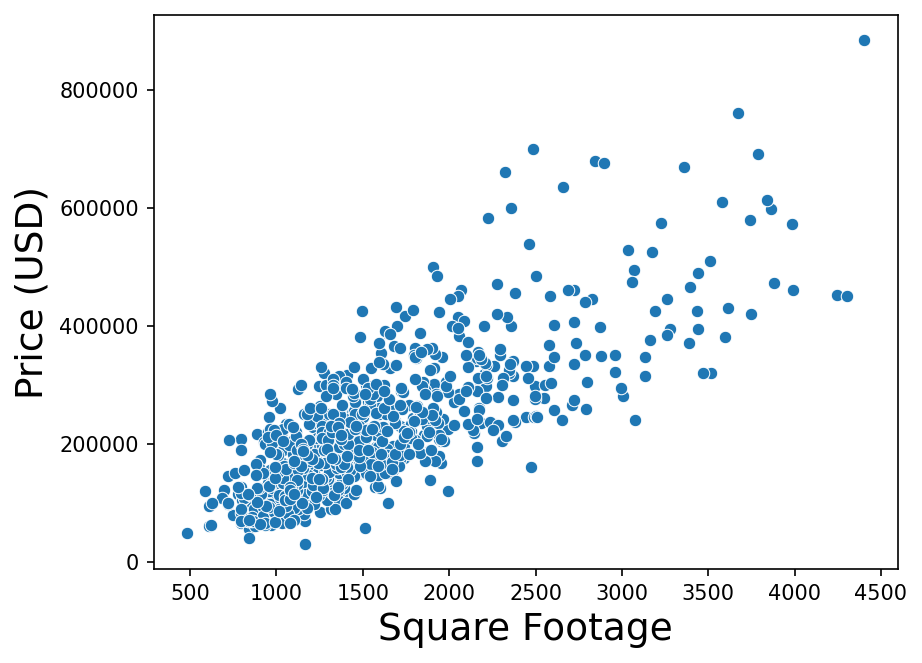

In [4]:
sq_ft_plot = sns.scatterplot(data=df, x="sq__ft", y="price")
sq_ft_plot.set(xlabel="Square Footage", ylabel="Price (USD)")

And the linear analysis

In [5]:
scipy.stats.linregress(df.price, df.sq__ft)

LinregressResult(slope=0.004372852291801698, intercept=601.0706041791153, rvalue=0.7781495213681995, pvalue=3.8758415565510652e-162, stderr=0.00012541615612172096, intercept_stderr=31.732029383686147)

This appears to be a good predictor.

## Latitude vs. Price Analysis

[Text(0.5, 0, 'Latitude'), Text(0, 0.5, 'Price (USD)')]

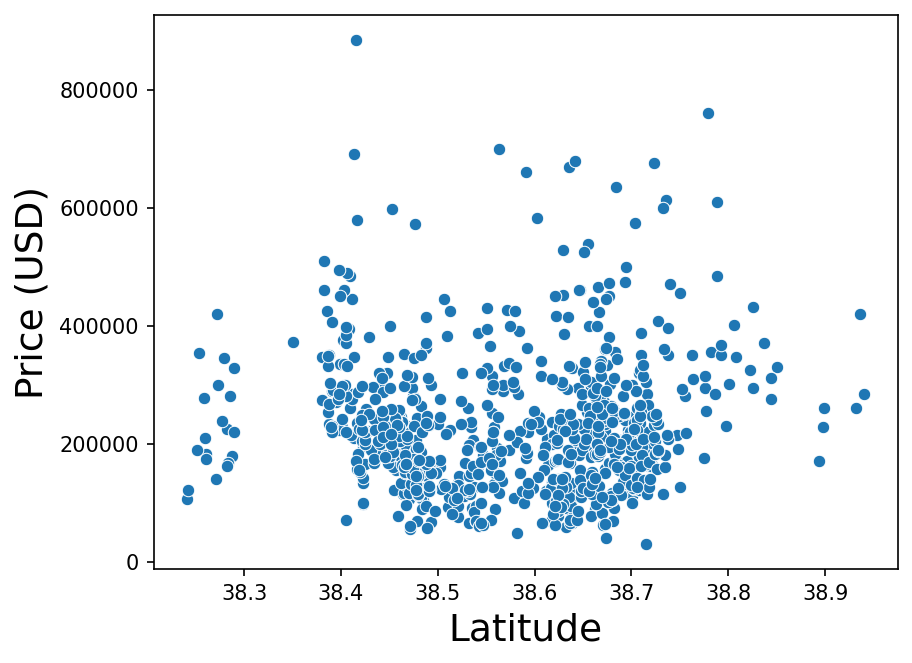

In [6]:
lat_plot = sns.scatterplot(data=df, x="latitude", y="price")
lat_plot.set(xlabel="Latitude", ylabel="Price (USD)")

In [7]:
scipy.stats.linregress(df.latitude, df.sq__ft)

LinregressResult(slope=-562.779536813326, intercept=23296.113887440897, rvalue=-0.10800164416270445, pvalue=0.0023083473164012794, stderr=184.0761698648461, intercept_stderr=7100.84628857426)

This does not appear to be good predictor.

## Longitude vs. Price Analysis

[Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Price (USD)')]

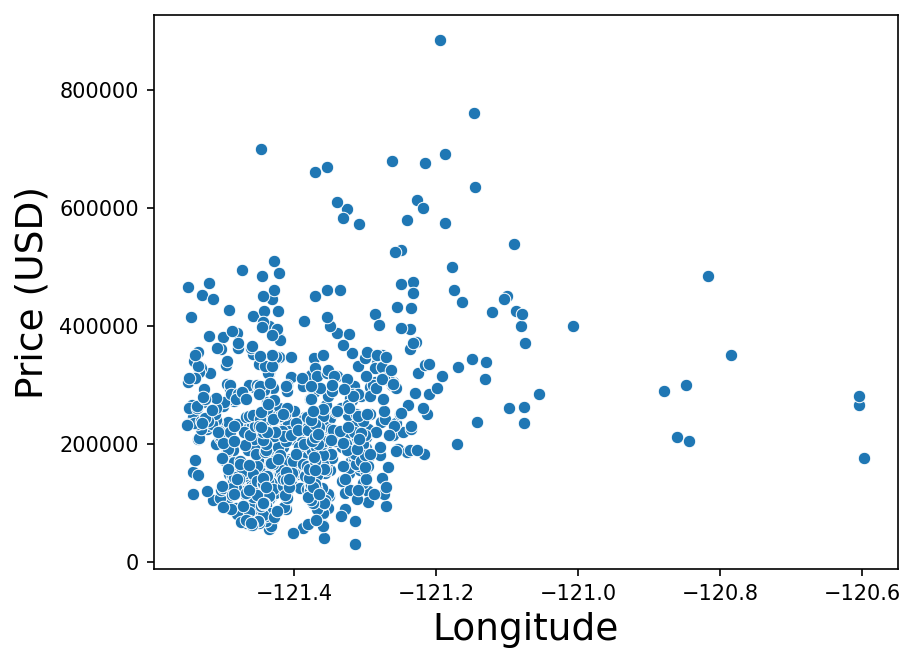

In [8]:
long_plot = sns.scatterplot(data=df, x="longitude", y="price")
long_plot.set(xlabel="Longitude", ylabel="Price (USD)")

In [9]:
scipy.stats.linregress(df.longitude, df.sq__ft)

LinregressResult(slope=681.2667929977241, intercept=84280.1096786246, rvalue=0.12046744053334134, pvalue=0.0006699763143814081, stderr=199.48512976668727, intercept_stderr=24213.888023735544)

This appears to be an okay predictor.

# Categorical Variable Analysis (Price)

We can compare price to the following columns for categorical analysis
* city
* zip
* beds
* baths
* type

## City vs. Price Analysis

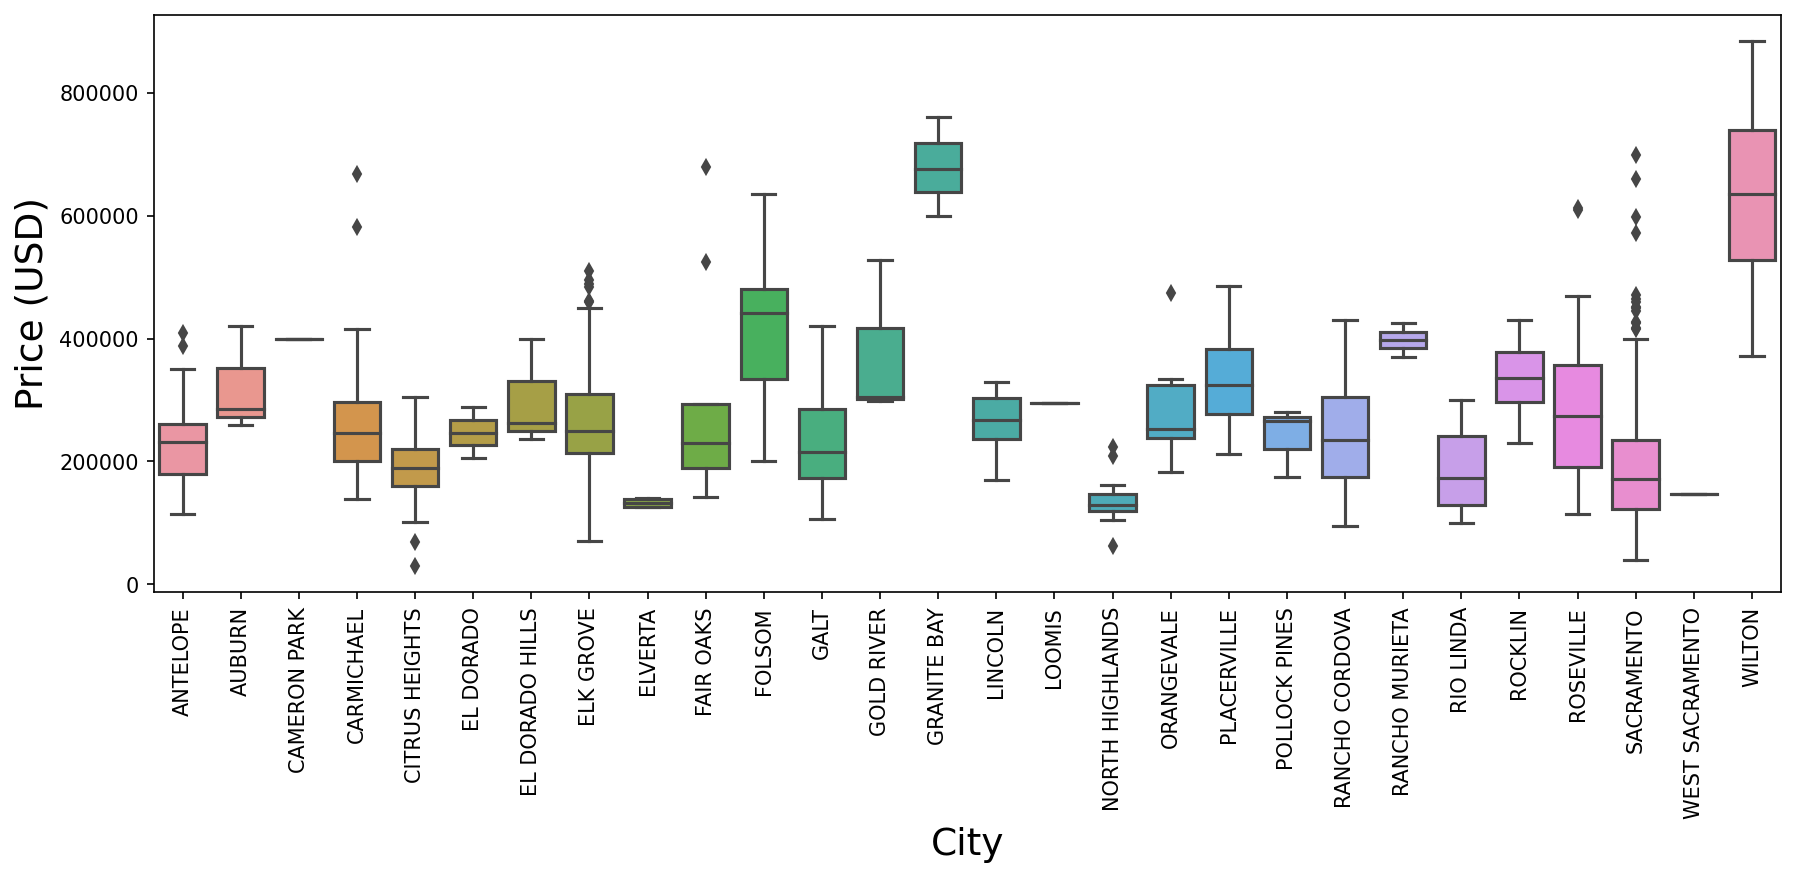

In [10]:
_, ax = plt.pyplot.subplots(figsize=(14, 5))
city_plot = sns.boxplot(data=df, x="city", y="price", ax=ax)
city_plot.set(xlabel="City", ylabel="Price (USD)");
city_plot.tick_params(axis="x", rotation=90)

In [11]:
scipy.stats.kruskal(*df.city.cat.categories.to_series().apply(lambda value: df.price[df.city == value].array))

KruskalResult(statistic=210.4983192423353, pvalue=2.453368806480581e-30)

This appears to be a good predictor.

## Zip vs. Price Analysis

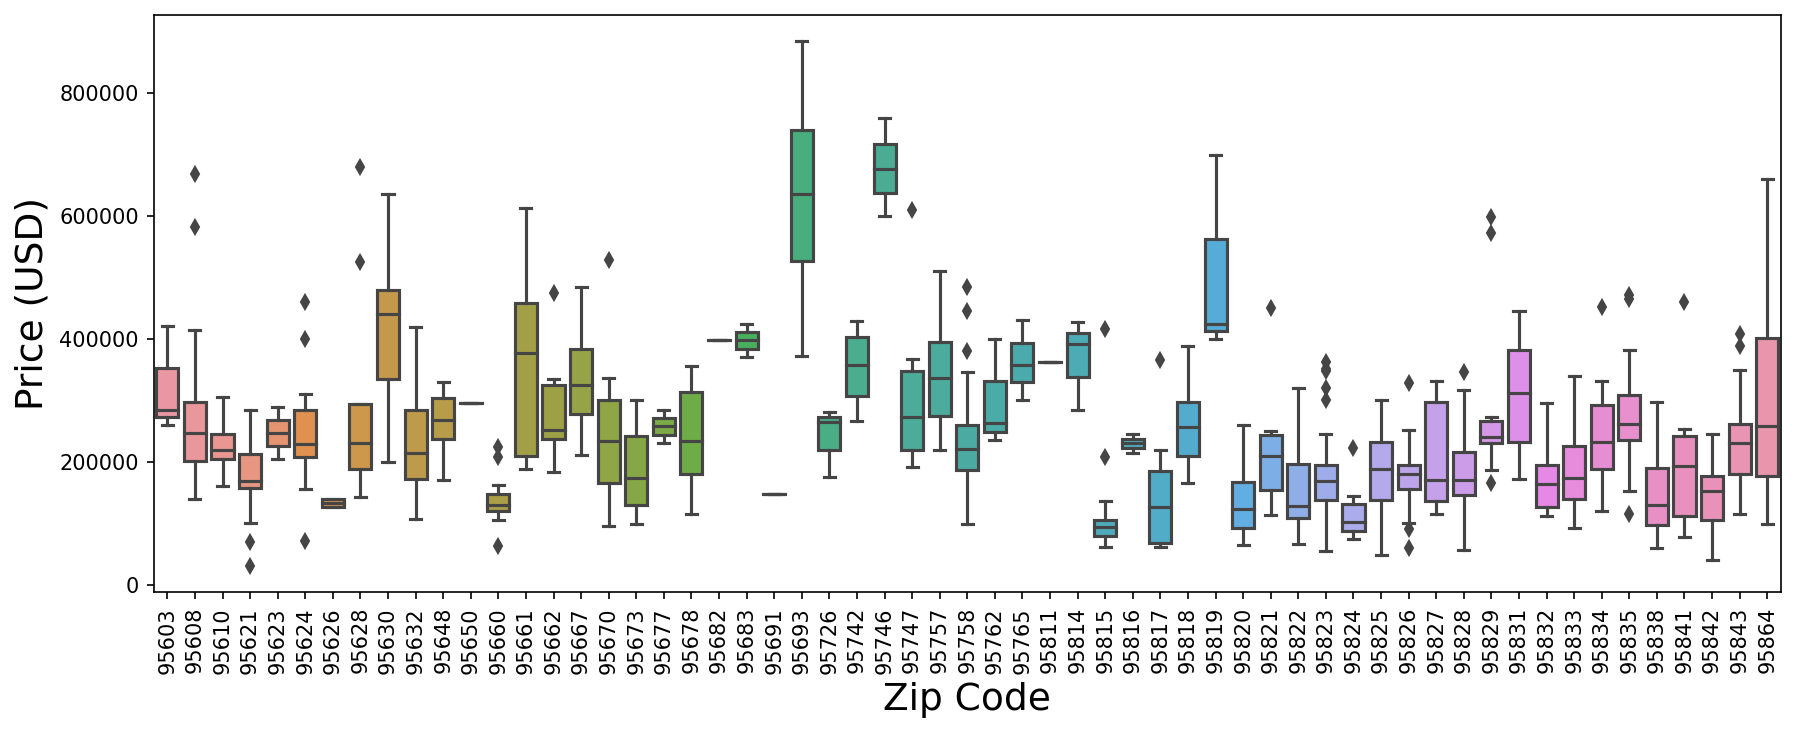

In [12]:
_, ax = plt.pyplot.subplots(figsize=(14, 5))
zip_plot = sns.boxplot(data=df, x="zip", y="price", ax=ax)
zip_plot.set(xlabel="Zip Code", ylabel="Price (USD)");
zip_plot.tick_params(axis="x", rotation=90)

In [13]:
scipy.stats.kruskal(*df.zip.cat.categories.to_series().apply(lambda value: df.price[df.zip == value].array))

KruskalResult(statistic=376.1567490767749, pvalue=3.8502223833887507e-48)

This appears to be a good predictor.

## Beds vs. Price Analysis

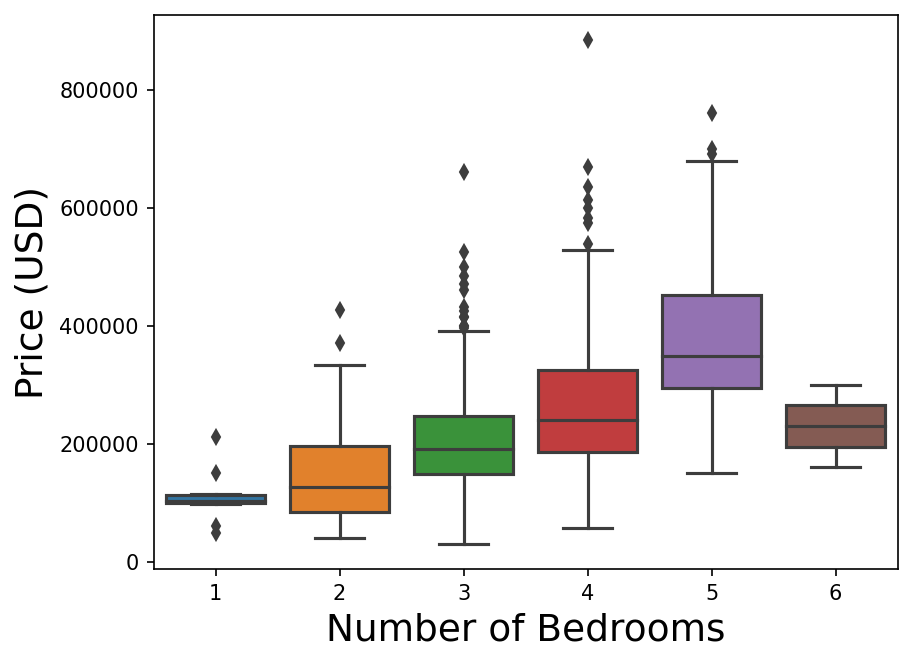

In [14]:
beds_plot = sns.boxplot(data=df, x="beds", y="price")
beds_plot.set(xlabel="Number of Bedrooms", ylabel="Price (USD)");

In [15]:
scipy.stats.kruskal(*pd.Series(df.beds.unique()).apply(lambda value: df.price[df.beds == value].array))

KruskalResult(statistic=204.30217145100872, pvalue=3.411433515370206e-42)

This appears to be a good predictor.

## Baths vs. Price Analysis

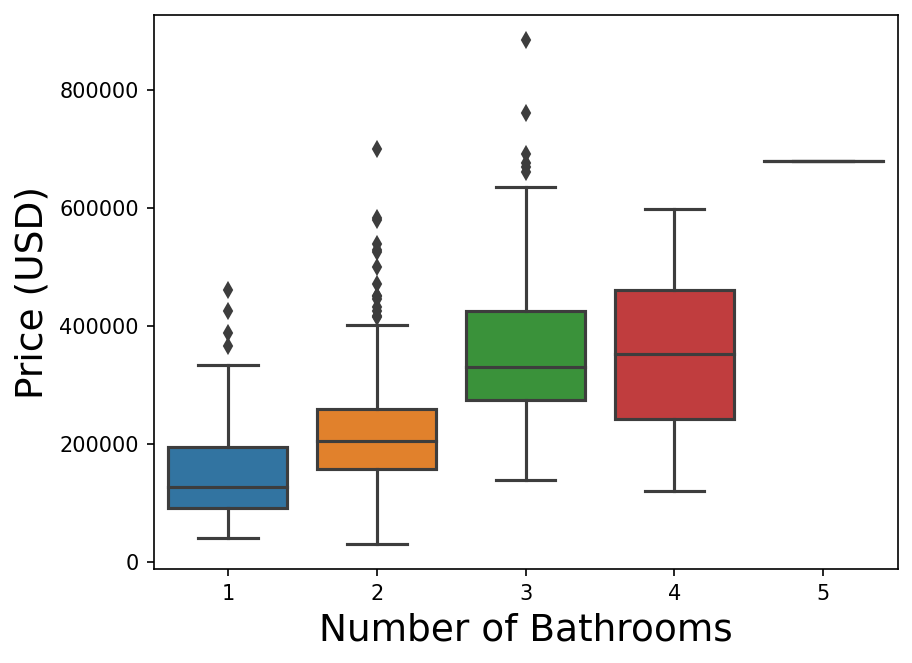

In [16]:
baths_plot = sns.boxplot(data=df, x="baths", y="price")
baths_plot.set(xlabel="Number of Bathrooms", ylabel="Price (USD)");

In [17]:
scipy.stats.kruskal(*pd.Series(df.baths.unique()).apply(lambda value: df.price[df.baths == value].array))

KruskalResult(statistic=253.18319698269218, pvalue=1.3421139741727966e-53)

This appears to be a good predictor.

## Type vs. Price Analysis

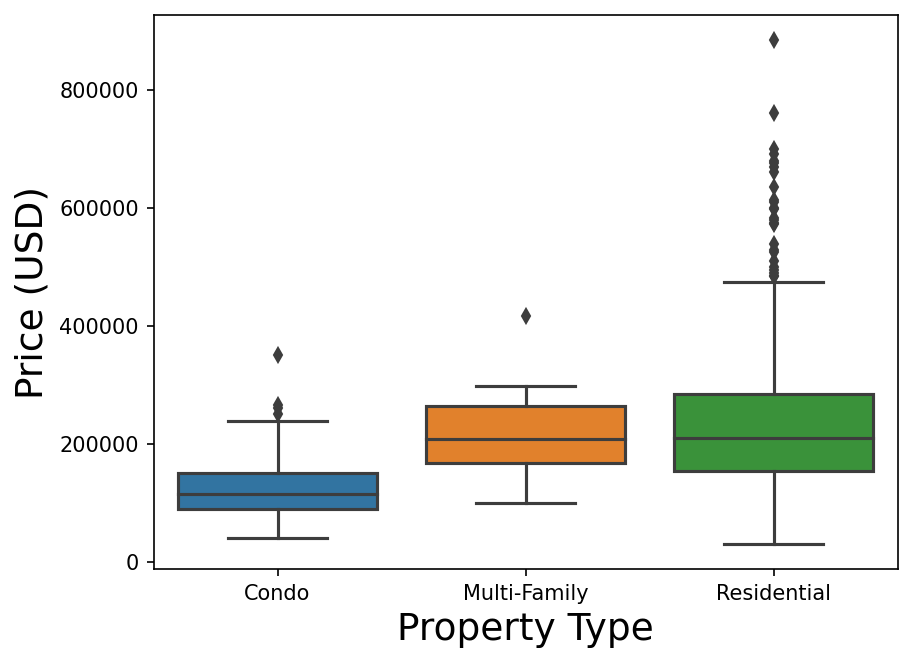

In [18]:
type_plot = sns.boxplot(data=df, x="type", y="price")
type_plot.set(xlabel="Property Type", ylabel="Price (USD)");

In [19]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.price[df.type == value].array))

KruskalResult(statistic=40.96790317206112, pvalue=1.270377691216139e-09)

This appears to be an okay predictor.

# Continuous Variable Analysis (Property Type)

We can compare the property type to the following continuous variables:
* price
* sq__ft* latitude
* 
longitude

## Price vs. Property Type Analysis

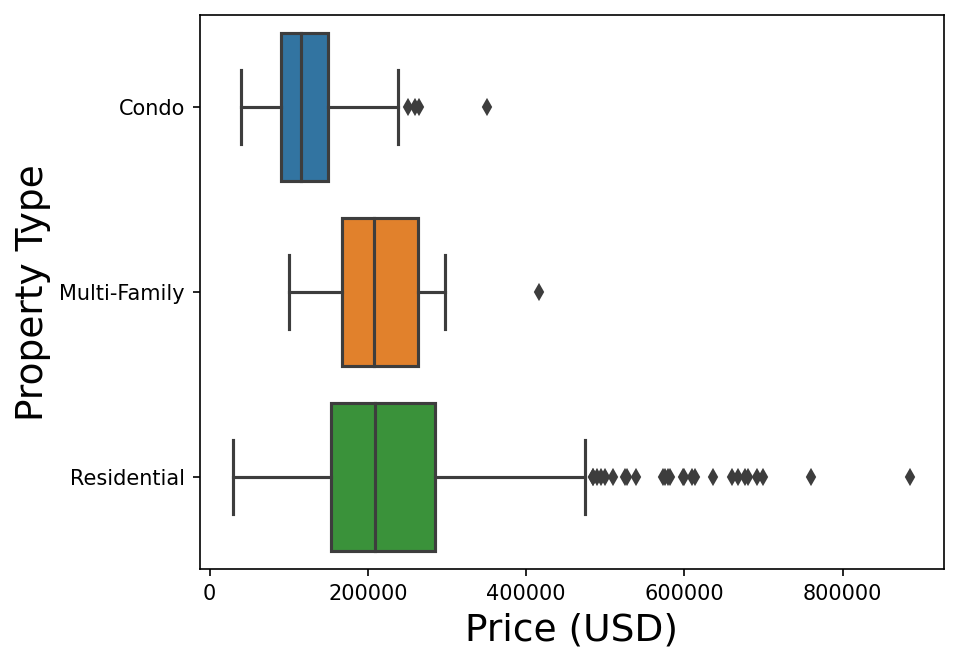

In [20]:
price_type_plot = sns.boxplot(data=df, x="price", y="type")
price_type_plot.set(xlabel="Price (USD)", ylabel="Property Type");

In [21]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.price[df.type == value].array))

KruskalResult(statistic=40.96790317206112, pvalue=1.270377691216139e-09)

This appears to be an okay predictor.

## Square Footage vs. Property Type Analysis

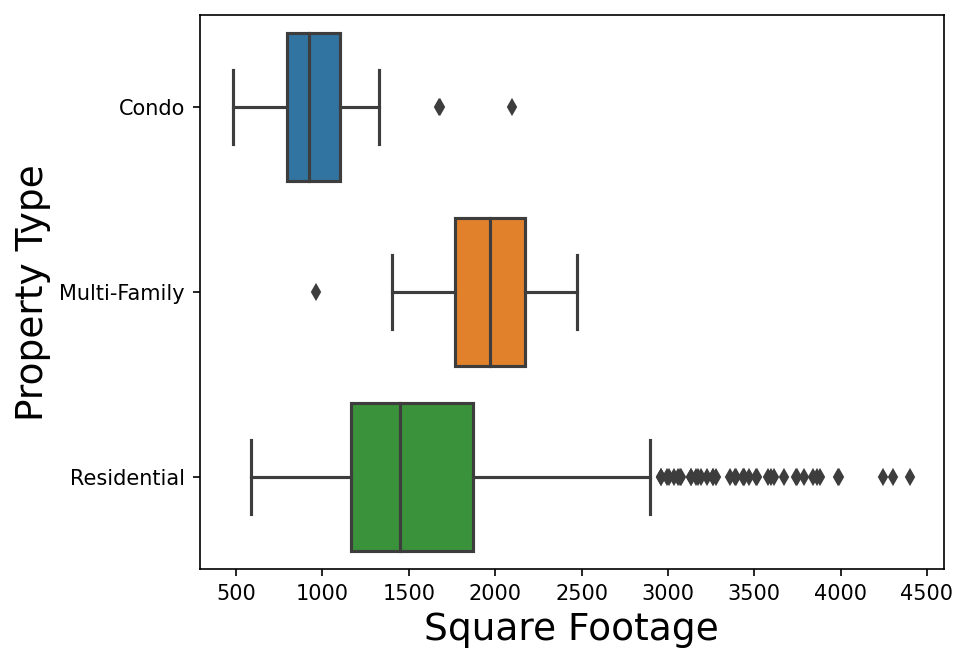

In [22]:
sq_ft_type_plot = sns.boxplot(data=df, x="sq__ft", y="type")
sq_ft_type_plot.set(xlabel="Square Footage", ylabel="Property Type");

In [23]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.sq__ft[df.type == value].array))

KruskalResult(statistic=67.53751863189704, pvalue=2.159803140666038e-15)

This appears to be a good predictor.

## Latitude vs. Property Type Analysis

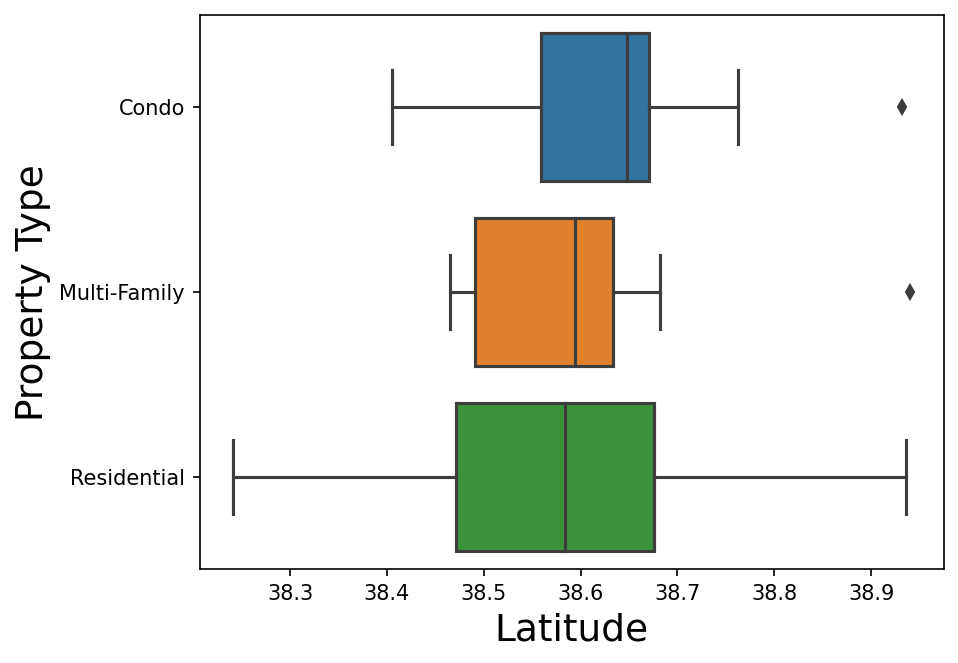

In [24]:
lat_type_plot = sns.boxplot(data=df, x="latitude", y="type")
lat_type_plot.set(xlabel="Latitude", ylabel="Property Type");

In [25]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.latitude[df.type == value].array))

KruskalResult(statistic=4.082470277114968, pvalue=0.1298682065469892)

This does not appear to be a good predictor.

## Longitude vs. Property Type Analysis

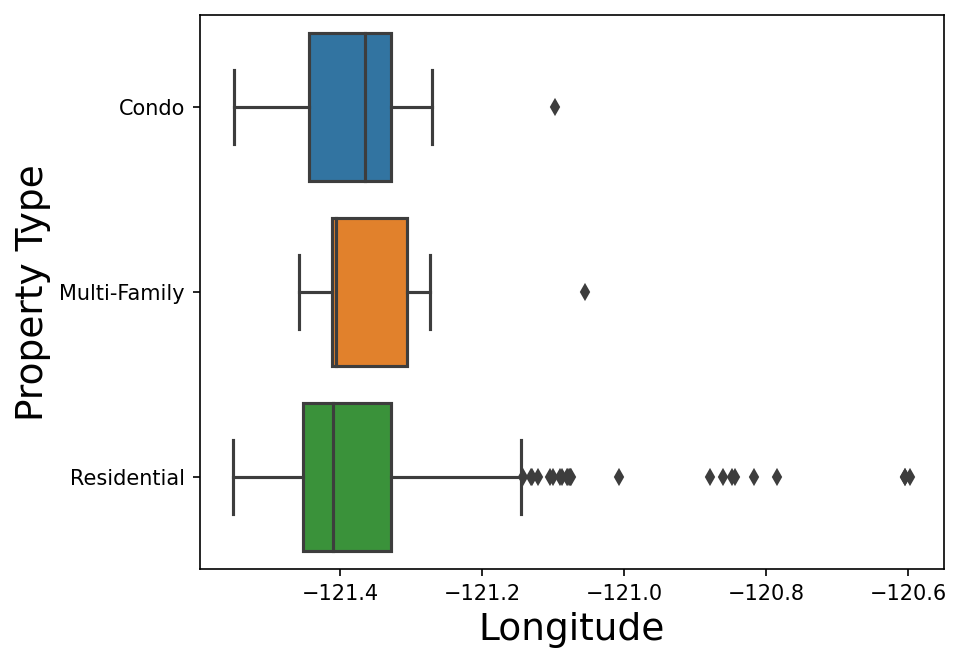

In [26]:
long_type_plot = sns.boxplot(data=df, x="longitude", y="type")
long_type_plot.set(xlabel="Longitude", ylabel="Property Type");

In [27]:
scipy.stats.kruskal(*df.type.cat.categories.to_series().apply(lambda value: df.longitude[df.type == value].array))

KruskalResult(statistic=1.7787734051580741, pvalue=0.4109076841129423)

This does not appear to be a good predictor.

# Categorical Variable Analysis (Property Type)

We can compare the property type to the following categorical variables:
* city
* zip
* beds
* baths

## City vs. Property Type Analysis

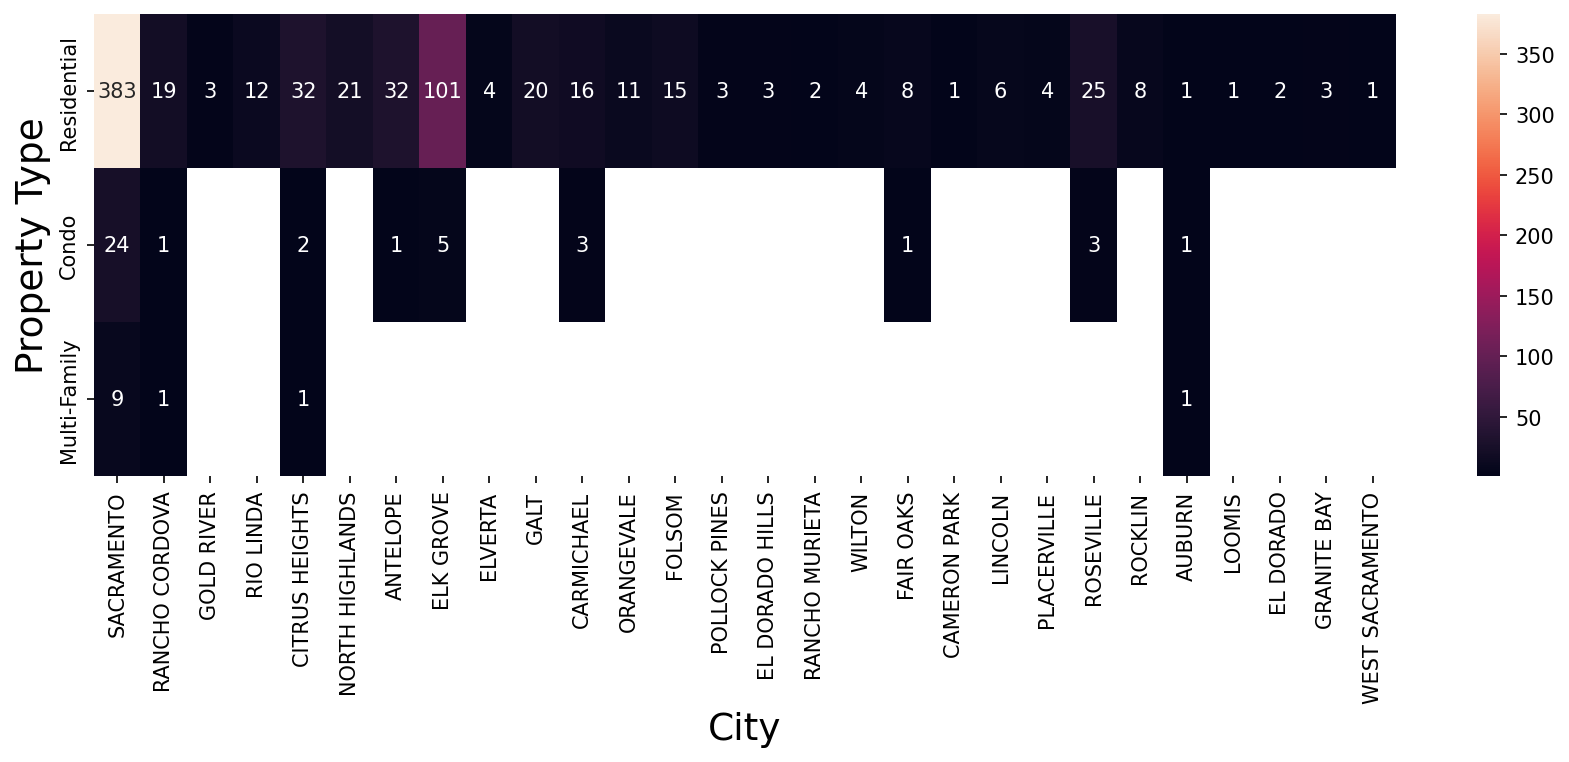

In [28]:
city_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    city_type[row.city][row.type] += 1
_, ax = plt.pyplot.subplots(figsize=(14, 4))
city_type_heat = sns.heatmap(pd.DataFrame.from_dict(city_type), annot=True, fmt=".0f", ax=ax)
city_type_heat.set(xlabel="City", ylabel="Property Type");

In [29]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["city", "type"]].groupby(by=["city", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=48.26803546298892, p=0.6941290940534962


This does not appear to be a good predictor.

## Zip vs. Property Type Analysis

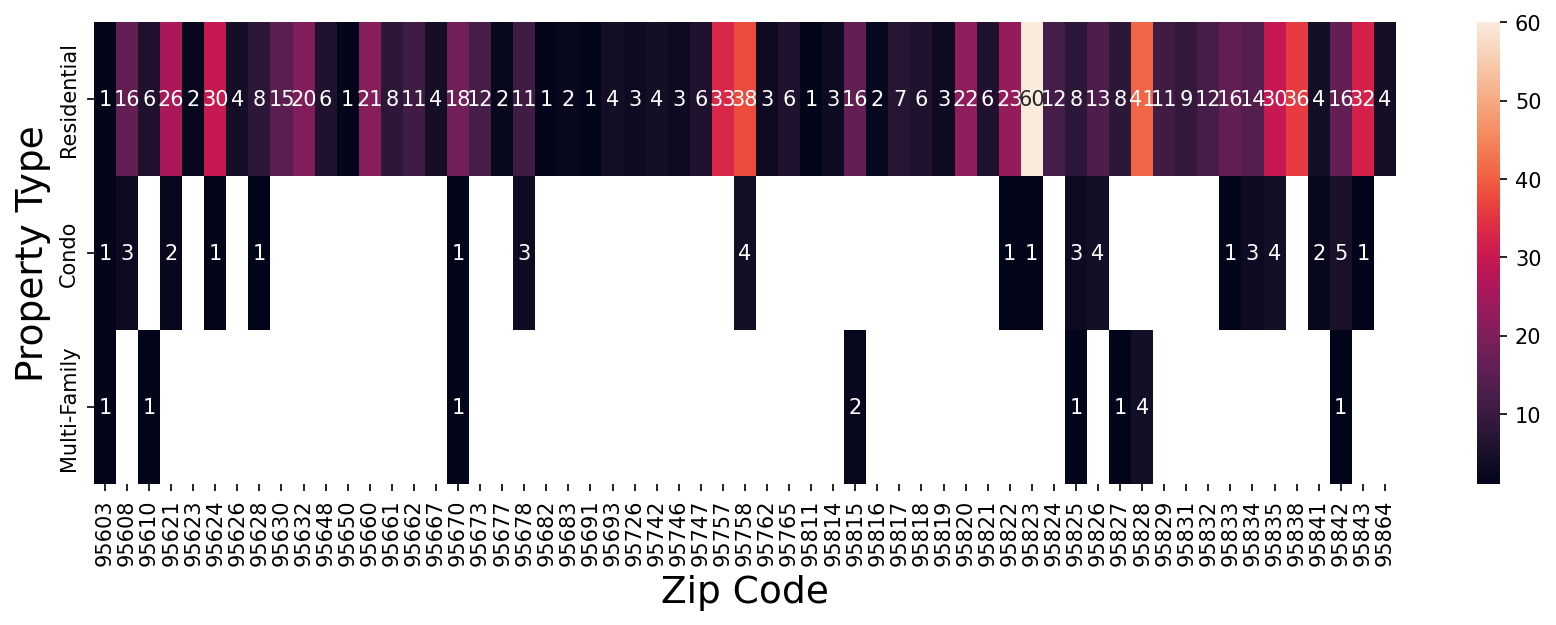

In [30]:
zip_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    zip_type[row.zip][row.type] += 1
_, ax = plt.pyplot.subplots(figsize=(14, 4))
zip_type_heat = sns.heatmap(pd.DataFrame.from_dict(zip_type).sort_index(axis=1), annot=True, fmt=".0f", ax=ax)
zip_type_heat.set(xlabel="Zip Code", ylabel="Property Type");

In [31]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["zip", "type"]].groupby(by=["zip", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=174.55950750710994, p=0.00036003926324442776


This appears to be an okay predictor.

## Beds vs. Property Type Analysis

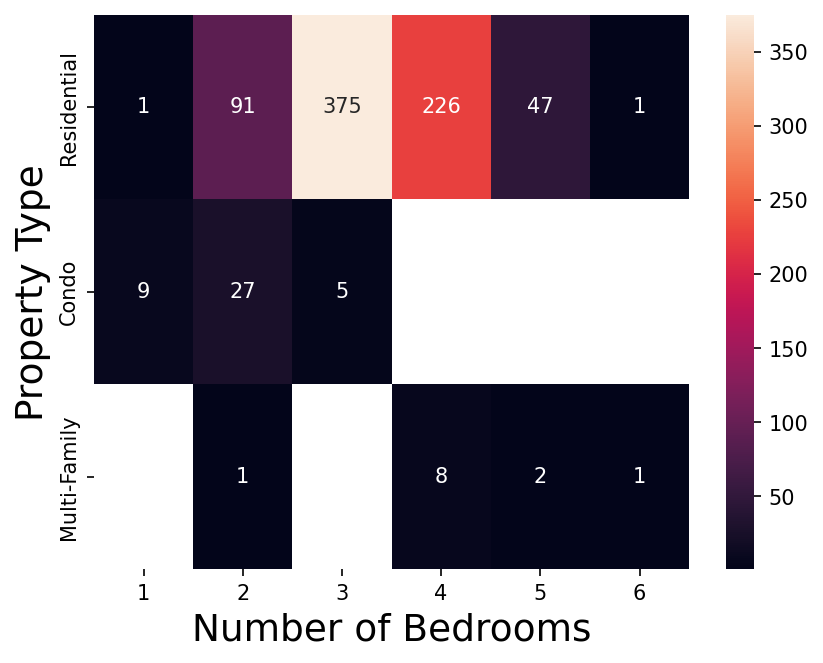

In [32]:
beds_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    beds_type[row.beds][row.type] += 1
beds_type_heat = sns.heatmap(pd.DataFrame.from_dict(beds_type).sort_index(axis=1), annot=True, fmt=".0f")
beds_type_heat.set(xlabel="Number of Bedrooms", ylabel="Property Type");

In [33]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["beds", "type"]].groupby(by=["beds", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=293.8460455250152, p=3.105946362678771e-57


This appears to be a good predictor.

## Baths vs. Property Type Analysis

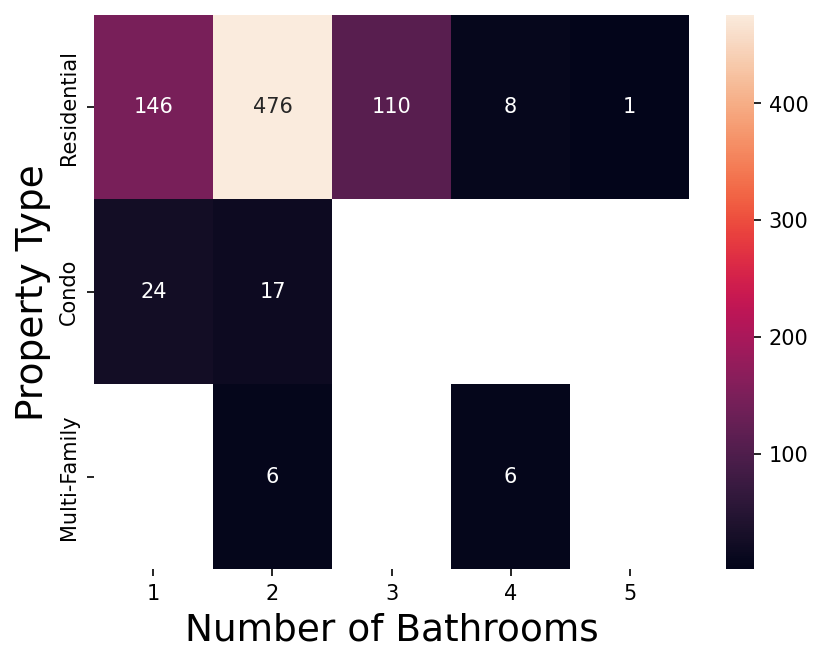

In [34]:
baths_type = defaultdict(lambda: defaultdict(int))
for index, row in df.iterrows():
    baths_type[row.baths][row.type] += 1
baths_type_heat = sns.heatmap(pd.DataFrame.from_dict(baths_type).sort_index(axis=1), annot=True, fmt=".0f")
baths_type_heat.set(xlabel="Number of Bathrooms", ylabel="Property Type");

In [35]:
chi2, p, _, _ = scipy.stats.chi2_contingency(df[["baths", "type"]].groupby(by=["baths", "type"]).size().unstack(level=0))
print(f"chi2={chi2}, p={p}")

chi2=202.47941902416085, p=1.91860608202184e-39


This appears to be a good predictor.